# 8 Queens

### Introduction

<figure>
<img src="resources/eight_queens_moves.png", width=300 align="right">
    <figcaption></figcaption>
</figure>

The [Eight Queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is a famous puzzle that has been studied extensively in- and outside of computer science. It was first published in the chess magazine _Schach_ in 1848. 

The problem can be formulated as follows: 

_"Place 8 queens on a regular (8x8) chess board such that no queen attacks any other queen."_

A queen in the game of chess can move horizontally, vertically, and diagonally. The puzzle can be solved by hand (and even [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) studied it back in 1850).

The EightQueensState class below, as well as the methods defined, should prove a helpful start for a Genetic Algorithms approach. However, you are welcome to change as little or as much of the code as is useful.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import  ipywidgets as widgets


class EightQueensState:
    """This class represents a board in the eight queens puzzle"""
    def __init__(self, state=None, n=8):
        """
        :param state: pass in a numpy array of integers to set the state, otherwise will be generated randomly
        :param n: only used if state is not provided, determines size of board (default: 8)
        """
        if state is None:
            self.n = n
            state = np.random.randint(0, n, n)
        else:
            self.n = len(state)
        self.state = state
        self.fitness = None

    @staticmethod
    def copy_replace(state, i, x):
        """This creates a copy of the state (important as numpy arrays are mutable) with column i set to x"""
        new_state = state.copy()
        new_state[i] = x
        return new_state

    @staticmethod
    def range_missing(start, stop, missing):
        """
        This creates a list of numbers with a single value missing
        e.g. range_missing(0, 8, 2) -> [0, 1, 3, 4, 5, 6, 7]
        """
        return list(range(start, missing)) + list(range(missing + 1, stop))

    def cost(self):
        """Calculates the number of pairs attacking"""
        count = 0
        for i in range(len(self.state) - 1):
            # for each queen, look in columns to the right
            # add one to the count if there is another queen in the same row
            count += (self.state[i] == np.array(self.state[i + 1:])).sum()

            # add one to the count for each queen on the upper or lower diagonal
            upper_diagonal = self.state[i] + np.arange(1, self.n - i)
            lower_diagonal = self.state[i] - np.arange(1, self.n - i)
            count += (np.array(self.state[i + 1:]) == upper_diagonal).sum()
            count += (np.array(self.state[i + 1:]) == lower_diagonal).sum()
        return count
    
    def neighbourhood(self):
        """This generates every state possible by changing a single queen position"""
        neighbourhood = []
        for column in range(self.n):
            for new_position in self.range_missing(0, self.n, self.state[column]):
                new_state = self.copy_replace(self.state, column, new_position)
                neighbourhood.append(EightQueensState(new_state))

        return neighbourhood

    def random_neighbour(self):
        """Generates a single random neighbour state, useful for some algorithms"""
        column = np.random.choice(range(self.n))
        new_position = np.random.choice(self.range_missing(0, self.n, self.state[column]))
        new_state = self.copy_replace(self.state, column, new_position)
        return EightQueensState(new_state)

    def is_goal(self):
        return self.cost() == 0
    
    def calculate_fitness(self, fitness_function):
        self.fitness = fitness_function(self.cost())
        return self.fitness
    
    def display(self, brgt=0.2):
        fig, ax = plt.subplots(figsize=(5, 5))

        xy = np.zeros(shape=(self.n, self.n))
        checker1 = [1 if i % 2 ==0 else 0 for i in range(self.n)]
        checker2 = [1 if i % 2 ==1 else 0 for i in range(self.n)]
        board = np.array([checker1 if i % 2 == 0 else checker2 for i in range(self.n)]) * brgt
        ax.axis('off')
        ax.pcolormesh(board, cmap='gray', edgecolors='none')
        for col, row in enumerate(self.state):
            if row >= 0:  # Assuming negative values are not valid positions
                ax.text(col + 0.5, self.n - row - 0.5, 'Q', ha='center', va='center', color='red', fontsize=20)
        ax.text(0, -0.5, f'Cost: {self.cost()}', ha='left', va='center', color='black', fontsize=12)
        plt.show(fig)
    
        
    def __str__(self):
        if self.is_goal():
            return f"Goal state! {self.state}"
        else:
            return f"{self.state} cost {self.cost()}"

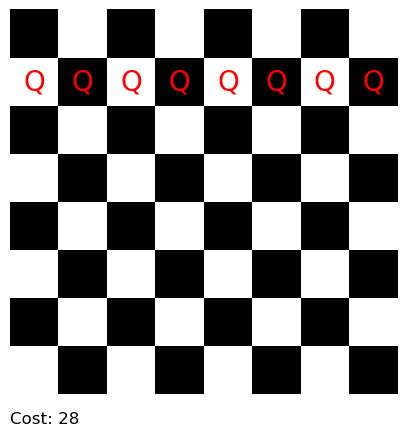

28

In [2]:
winning_state = np.array([6,4,2,0,5,7,1,3])
losing_state = np.array([1,1,1,1,1,1,1,1])
state = EightQueensState(losing_state)
state.display(0.2)
state.cost()

In [3]:
import math
states = [EightQueensState(winning_state), EightQueensState(), EightQueensState(losing_state)]

def n_choose_k(n, k=2):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

def fitness(cost, pow=math.e, n=8):
    worst = n_choose_k(n, 2)       
    return (worst - cost) ** pow / worst ** pow

def plot_fitnesses_with_exponent(pow):
    costs = np.arange(0, 29)
    fitnesses = [fitness(c, pow) for c in costs]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    color = 'tab:blue'
    ax1.set_xlabel('Cost')
    ax1.set_ylabel('Cost', color=color)
    ax1.plot(costs, costs, label='Cost', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Fitness', color=color)
    ax2.plot(costs, fitnesses, label='Fitness', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f'Cost and Fitness over Range with Exponent {pow}')
    fig.tight_layout()
    plt.show()

# Create the slider for the exponent
slider = widgets.FloatSlider(value=math.e, min=1.0, max=10.0, step=0.1, description='Exponent:')

# Link the slider to the plotting function
display(widgets.interactive(plot_fitnesses_with_exponent, pow=slider))
    

interactive(children=(FloatSlider(value=2.718281828459045, description='Exponent:', max=10.0, min=1.0), Output…

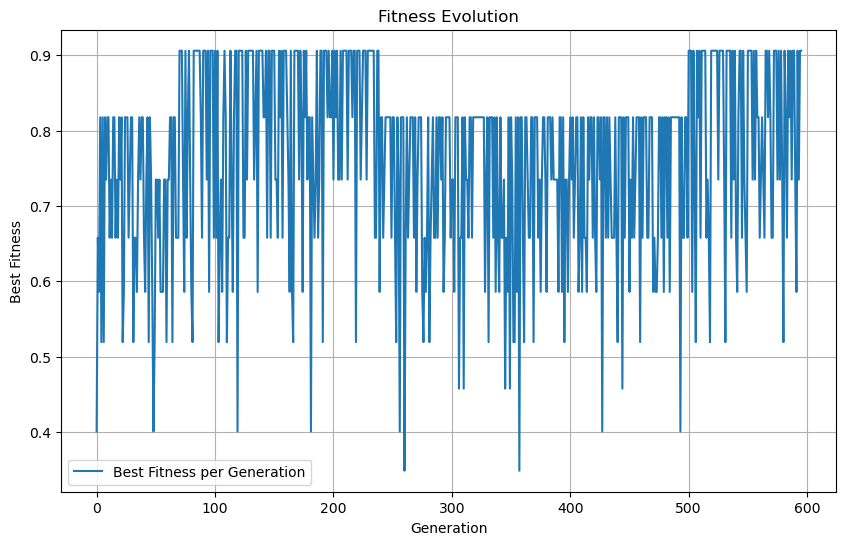

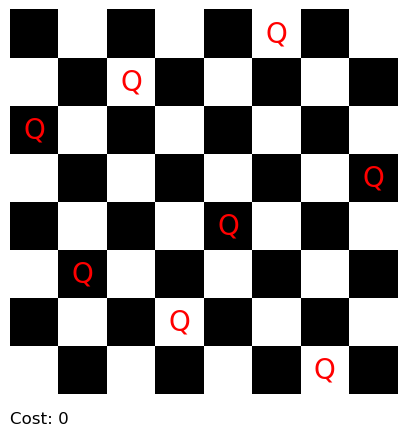

CPU times: total: 297 ms
Wall time: 1.42 s


In [4]:
%%time
import logging
logging.basicConfig(filename='generations.log', 
                    filemode='w', 
                    level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s', 
                    datefmt='%m/%d/%Y %I:%M:%S %p')
class GA:
    def __init__(self, initial_pop, fitness_function, n_generations=1):
        np.random.seed(10)
        self.shape = len(initial_pop[0].state)
        self.n_generations = n_generations
        self.fitness_function = fitness_function
        self.population = np.array(initial_pop)
        self.population_size = len(initial_pop)
        self.log = []
        
    def generate(self):
        best_fitness = 0
        best_score = None
        best_state = None
        for i in range(self.n_generations):
            fitnesses = [state.calculate_fitness(self.fitness_function) for state in self.population]
            sorted_idx = np.argsort(fitnesses)[-1:0:-1]
            sorted_population = [self.population[i] for i in sorted_idx]
            logging.info(f"Generation {i}| F {fitnesses[0]},{fitnesses[1]}")
            best_state = sorted_population[0]
            best_score = best_state.fitness
            if any(state.is_goal() for state in sorted_population): break
            children = self.reproduce(sorted_population[0].state, sorted_population[1].state, self.crossover)
            logging.info(f"Generation {i}| C {str(children)}")
            self.population = [EightQueensState(child) for child in children]
            self.log.append(fitnesses[0])
        self.plot_loss()
            
            # print([x.fitness for x in sorted_population])
        return sorted_population[0]
    
    def weighted_by(self, fitnesses):
        return np.multiply(fitnesses, 1/sum(fitnesses))
    
    def reproduce(self, p1, p2, splitting_function):
        sequence = [self.mutate(c) for c in splitting_function(p1, p2)]
        return sequence
        
    def crossover(self, p1, p2):
        children = []
        for i in range(self.population_size):
            np.random.seed(None)
            cp = self.population_size//2
            children.append(np.concatenate([p1[:cp], p2[cp:]]))
        return children
    
    def mutate(self, child, mutation_rate=0.1):
        for i in range(len(child)):
            if np.random.rand() < mutation_rate:
                child[i] = np.random.randint(0, self.shape)  
        return child
    
    def plot_loss(self):
            plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
            plt.plot(self.log, label='Best Fitness per Generation')
            plt.title('Fitness Evolution')
            plt.xlabel('Generation')
            plt.ylabel('Best Fitness')
            plt.legend()
            plt.grid(True)
            plt.show()

np.random.seed(10)
population = np.array([EightQueensState() for i in range(10)])
generative_agent = GA(population, fitness_function=fitness, n_generations=10000)
best = generative_agent.generate()
best.display()


            



In [5]:
    def tests(self, agent: MyAgent):
        """This is the same test method from the dice_game.ipynb file. It is used to test the fitness of the agents."""
        import time

        total_score = 0
        total_time = 0
        n = 10
        np.random.seed(10)
        game = agent.game
        start_time = time.process_time()
        test_agent = agent
        total_time += time.process_time() - start_time

        for i in range(n):
            start_time = time.process_time()
            score = play_game_with_agent(test_agent, game)
            total_time += time.process_time() - start_time
            total_score += score

        average_time = total_time / n
        average_score = total_score / n
        fitness = average_score / average_time
        agent.fitness = fitness
        return fitness

    def weighted_by(self, population):
        """ This function returns a list of weights based on the fitness of the agents in the population from tests."""
        population_fitness = [self.tests(item) for item in population]
        weighting = [fitness / sum(population_fitness) for fitness in population_fitness]
        return weighting

    def weighted_random_choice(self, weights : list, number_of_choices : int):
        """ This function returns a list of agents based on the weights provided."""
        return [np.random.choice(self.population, p = weights) for _ in range(number_of_choices)]

    def reproduce(self, parent1: MyAgent, parent2: MyAgent):
        """ This function returns an agent with a weighted blending of the parents gamma and epsilon."""
        p1_w, p2_w = self.weighted_blending(parent1, parent2)
        gamma = (p1_w * parent1.gamma) + (p2_w * parent2.gamma)
        epsilon = (p1_w * parent1.epsilon) + (p2_w * parent2.epsilon)
        return MyAgent(DiceGame(), gamma, epsilon)

    def weighted_blending(self, parent1:MyAgent, parent2:MyAgent):
        """ This function returns the weighting of each parent based on their fitness."""
        lst = [parent1.fitness, parent2.fitness]
        total_weighting = sum(lst)
        individual_weighting = [f/total_weighting for f in lst]
        return individual_weighting[0], individual_weighting[1]


    def mutate(self):
        """This function returns an agent with a random mutation."""
        return MyAgent(DiceGame(), remap1(random.random()), remap2(random.random()))

    def genetic_algorithm(self, n):
        """This is the main function for the genetic algorithm. Returns the best agent found after n
        iterations."""

        pop = self.population.copy()
        iterations = 0
        converged = False
        delta = 0
        best_fitness = 0
        best_agent = None
        # This portion is adapted from Russell and Norvig's textbook.
        while iterations < n:
            pop2 = []
            weights = self.weighted_by(pop)
            pop = sorted(pop, key=lambda x: x.fitness)
            best_agent = pop[-1]
            if best_agent.fitness > best_fitness:
                best_agent = best_agent
                best_fitness = best_agent.fitness

            print(f"i:{iterations} |" + str([(agent.gamma, agent.epsilon) for agent in pop]))
            for i in range(len(pop)):
                p1, p2 = self.weighted_random_choice(weights, 2)
                child = self.reproduce(p1,p2)
                if random.random() < 0.1:
                    child = self.mutate()
                pop2.append(child)
            pop = pop2

            iterations += 1

        print(f"best agent: {best_agent}")
        return pop

NameError: name 'MyAgent' is not defined